<a href="https://colab.research.google.com/github/AramisRamirezITT/Genetic_Algorithm_Polynomial/blob/main/algoritmo_curva_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genetico de Optimizacion de curvas

In [20]:
__author__ = ["J.L Aramis Ramirez Diaz"]
__credits__ = ["J.L Aramis Ramirez Diaz", "Dr. Marco Antonio Paz Ramos"]
__license__ = "MIT"
__version__ = "1.0.0"
__maintainer__ = ["J.L Aramis Ramirez Diaz"]
__email__ = "jdiaz@uag.edu.mx"
__status__ = "Development"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from numba import jit, cuda

! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Original Function

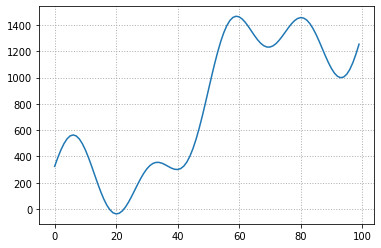

In [21]:
mod = [8, 25, 4, 45, 10, 17, 35]

x = np.arange(0, 100, 1)  # crea un array de valores de x de 0 a 100 en incrementos de 0.1
y = mod[0] * (mod[1] * np.sin(x / mod[2]) + mod[3] * np.cos(x / mod[4])) + mod[5] * x - mod[6]

plt.plot(x, y)
plt.grid( linestyle='dotted', linewidth=1)
plt.show() 


## Declaracion de la matriz de numeros aleatorios entre 1 y 20 de MxN donde M = 100, N = 20

In [22]:
# #MxN = Fila x Columna
matrix = np.empty((100, 7), dtype=int) # Matriz de 


for i in range(matrix.shape[0]):
    matrix[i] = np.random.choice(range(1, 255), size=7, replace=False)

matrix_children = np.zeros((100, 20)) # Matriz de 
matrix_gen = np.zeros((100, 20)) # Matriz de 




## Etiqueta de Cromosomas - Funcion para calcular el error absoluto punto a punto

In [23]:
def error_abs(mod_o, matrix):
    peso = int(255/max(mod))
    x = np.arange(0, 100, 1)
    vector_resul = np.zeros((matrix.shape[0], 1), dtype=int)
    
    y = mod_o[0] * (mod_o[1] * np.sin(x / mod_o[2]) + mod_o[3] * np.cos(x / mod_o[4])) + mod_o[5] * x - mod_o[6] 
    
    for i in range(0, matrix.shape[0]):
        resul = (matrix[i][0] / peso)* ( (matrix[i][1] / peso) * np.sin(x / (matrix[i][2]/ peso)) + (matrix[i][3] / peso) * np.cos(x / (matrix[i][4]/ peso))) + (matrix[i][5] / peso)* x - (matrix[i][6] / peso)       
        
        vector_resul[i] = np.sum(np.absolute(y - resul)) 
        
    matrix_plus_result = np.hstack((matrix, vector_resul)) # pegar el vector y la matriz
    
    return matrix_plus_result

# mod = [8, 25, 4, 45, 10, 17, 35]

# matrix_plus_result= error_abs(mod, matrix)

# print(matrix_plus_result)


## Reproduccion

In [24]:
#8, 16, 24, 32, 40, 48, 56
#
def reproduccion(array_pa, array_ma):
    get_bin = lambda x, n: format(x, 'b').zfill(n)    
    array_pa_edit = array_pa.copy()
    array_ma_edit = array_ma.copy()
    crop = np.random.randint(1, (len(array_pa_edit) * 8) - 1 )
    # crop = 32
    # print(crop)
    a = int(crop / 8)
    # print(a)
    index = a + 1
    
    if index >= 7:
        index = 6 
    resul = crop - a * 8
    if resul == 0:        
        index = a
    else:
        to_bin_pa = get_bin(array_pa_edit[a], 8) #str
        to_bin_ma = get_bin(array_ma_edit[a], 8) #str    
        pa_1 = to_bin_pa[:resul]
        pa_2 = to_bin_pa[resul:]
        ma_1 = to_bin_ma[:resul]
        ma_2 =  to_bin_ma[resul:]
        copy_papa = pa_1 + ma_2
        copy_mama = ma_1 + pa_2        
        
        copy_papa = int(copy_papa, 2)
        copy_mama = int(copy_mama, 2)        
        
        # print(copy_papa,int(copy_papa, 2) ,'pa')
        # print(copy_mama,int(copy_mama, 2) ,'ma')
        # print('-'*100)
        
        if copy_papa ==  0:
            copy_papa = 1
        elif copy_mama ==  0:
            copy_mama = 1
          
          
        array_pa_edit[a] = copy_mama
        array_ma_edit[a] = copy_papa
        
    # print(array_pa_edit[index:])
    # print(array_ma_edit[index:])
    aux = array_pa_edit[index:].copy()
    array_pa_edit[index:] =  array_ma_edit[index:].copy()
    array_ma_edit[index:] = aux

    # print(array_pa_edit)
    # print(array_ma_edit)
    # print('-'*100) 
    # print('-'*100) 
    return array_pa_edit, array_ma_edit
            
papa = np.array([19, 28, 36, 29,  6,  9, 49])
mama = np.array([ 4, 44, 50, 34, 22,  6, 25])

papa_edit, mama_edit =reproduccion(papa, mama)

print(papa_edit)
print(mama_edit)
print('-'*100)    
print(papa)
print(mama)


[19 28 36 29  6  9 25]
[ 4 44 50 34 22  6 49]
----------------------------------------------------------------------------------------------------
[19 28 36 29  6  9 49]
[ 4 44 50 34 22  6 25]


## Mutacion 

In [25]:
def mutation(matrix, porcentaje_mutacion):
    get_bin = lambda x, n: format(x, 'b').zfill(n)    
    porcentaje_mutacion
    part  = int((matrix.shape[0] * porcentaje_mutacion) / 100)    
    matrixx = matrix.copy()
    
    for i in range(0, part):         
        random_colum = np.random.randint(0, 7)
        random_bit = np.random.randint(0, 8)
        dec_to_bin = get_bin(matrixx[i][random_colum], 8) #str
        dec_to_bin = list(dec_to_bin)
        
        if dec_to_bin[random_bit] == '0':
            dec_to_bin[random_bit] = '1'
        else:
            dec_to_bin[random_bit] = '0'     
        dec_to_bin = ''.join(dec_to_bin)
        
        val_int =  int(dec_to_bin, 2)         
        
        if val_int == 0:
            val_int = 1

        matrixx[i][random_colum] =  val_int    
    return matrixx


## Elitismo

In [26]:
def elite(matrix, matrix_plus_result):
    # print(matrix.shape[0] + matrix_plus_result.shape[0])
    matrix_elite = np.zeros((matrix.shape[0] + matrix_plus_result.shape[0], matrix_plus_result.shape[1]), dtype=int ) 
    matrix_elite[:matrix.shape[0],:] = matrix[:matrix.shape[0],:]
    matrix_elite[matrix.shape[0]:,:] = matrix_plus_result[:matrix.shape[0],:]
    
    matrix_elite = matrix_elite[matrix_elite[:, 7].argsort()]
    matrix_elite = matrix_elite[:100, :]    
    # print(matrix_elite.shape)    
    return matrix_elite[:matrix.shape[0],:8]
    
    
# mod = [8, 25, 4, 45, 10, 17, 35]
# zzzz = elite(matrix,  error_abs(mod, matrix))
# print(zzzz.shape)

## Torneo

In [27]:
# 2 modos 
# Minimo 2 - Max 50% 
def tournament(matrix_plus_result, porcentaje_torneo):
    matrix_children = np.zeros((matrix_plus_result.shape[0], matrix_plus_result.shape[1] - 1), dtype=int)
    filas = matrix_plus_result.shape[0]
    list_tournament = [[[], []], [[], []]]    
    cont = 0
    # for fila in range(0, 15): #filas
    for fila in range(0, int(filas/2)): #filas
        for k in range(0, 2):
            # for i in range(0, np.random.randint(1, int(filas/2))):
            for i in range(0, np.random.randint(1, int((matrix.shape[0] * porcentaje_torneo) / 100) )):
                
                random_num = np.random.randint(0, filas)               
                list_tournament[k][0].append(matrix_plus_result[random_num, 7].copy())
                list_tournament[k][1].append(random_num)                          
        
        winner_p = min(list_tournament[0][0])            
        index_p  = list_tournament[0][1][list_tournament[0][0].index(winner_p)]    
        
        winner_m = min(list_tournament[1][0])            
        index_m  = list_tournament[1][1][list_tournament[1][0].index(winner_m)]                
        # print('Winer papa', winner_p)            
        # print(matrix[index_p, :])                        
        # print('Winer mama', winner_m)            
        # print(matrix[index_m, :])                        
        # print('-'*100)        
        papa_edit, mama_edit = reproduccion(matrix_plus_result[index_p, :7].copy(), matrix_plus_result[index_m, :7].copy())
        matrix_children[cont + fila] = papa_edit
        matrix_children[cont + fila + 1] = mama_edit
        # print(cont + fila, cont + fila + 1)
        cont+= 1

    return matrix_children
        
         
# kkk = tournament(error_abs(mod, matrix), 5)

# # print(kkk[kkk.shape[0] - 1, :])
# print(kkk)
      


## Graficacion

In [28]:

def graficar(mod, iteracion, vec_min,  x_d ,dist_min_x_gen ,dist_min):
    peso = int(255/max(mod))
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    x = np.arange(0, 100, 1)  # crea un array de valores de x de 0 a 100 en incrementos de 0.1
    y = mod[0] * (mod[1] * np.sin(x / mod[2]) + mod[3] * np.cos(x / mod[4])) + mod[5] * x - mod[6]
    # y1 = vec_min[0] * (vec_min[1] * np.sin(x / vec_min[2]) + vec_min[3] * np.cos(x / vec_min[4])) + vec_min[5] * x - vec_min[6]
    y1 = (vec_min[0] / peso)* ( (vec_min[1] / peso) * np.sin(x / (vec_min[2]/ peso)) + (vec_min[3] / peso) * np.cos(x / (vec_min[4]/ peso))) + (vec_min[5] / peso)* x - (vec_min[6] / peso)       


    axs[0].grid( linestyle='dotted', linewidth=1)
    axs[0].plot(x, y)
    axs[0].plot(x, y1)
    axs[0].set_title(f'Mejor Polinomio: {np.array(vec_min[0:6] / peso , dtype=int)}' , fontsize=10)
    
    axs[1].grid( linestyle='dotted', linewidth=1)
    axs[1].plot(np.array(x_d), np.array(dist_min_x_gen))
    axs[1].set_title(f'Distancia actual: {dist_min}' , fontsize=10)
    
    fig.suptitle(f'Algortimo Genetico - Polinomio - Generacion:{iteracion + 1}',  fontsize=14, y=0.98)
    fig.tight_layout()
    
    display(fig)
    clear_output(wait = True)
    plt.pause(0.01)

In [29]:
def plot_bestGen(mod, vec_min, best_gen):
 
  peso = int(255/max(mod))
  x = np.arange(0, 100, 1)  # crea un array de valores de x de 0 a 100 en incrementos de 0.1
  y = mod[0] * (mod[1] * np.sin(x / mod[2]) + mod[3] * np.cos(x / mod[4])) + mod[5] * x - mod[6]
  y1 = (vec_min[0] / peso)* ( (vec_min[1] / peso) * np.sin(x / (vec_min[2]/ peso)) + (vec_min[3] / peso) * np.cos(x / (vec_min[4]/ peso))) + (vec_min[5] / peso)* x - (vec_min[6] / peso)       

  plt.plot(x, y)
  plt.plot(x, y1)
  plt.grid( linestyle='dotted', linewidth=1)
  plt.title(f'Generacion Mejor Polinomio:{best_gen}')
  plt.show() 


# Run

In [30]:
def run(iteraciones, renglones, mod, porcentaje_torneo, porcentaje_mutacion, elit, grafic):    
    x = np.arange(0, 100, 1)  # crea un array de valores de x de 0 a 100 en incrementos de 0.1
    y = mod[0] * (mod[1] * np.sin(x / mod[2]) + mod[3] * np.cos(x / mod[4])) + mod[5] * x - mod[6]
    dist_min_x_gen = []
    x_d = []
    
    # matrix = np.zeros((renglones, len(mod)), dtype=int) 
    # maximus = int(255 / int(255/max(mod)))    
    
    # for i in range(matrix.shape[0]):
    #     matrix[i] = np.random.choice(range(1, maximus), size=len(mod), replace=False)

    matrix = np.zeros((renglones, len(mod)), dtype=int) # Matriz de 

    for i in range(matrix.shape[0]):
        matrix[i] = np.random.choice(range(1, 255), size=7, replace=False)

    
#------------------------------------------------------------------------------------------------------------------------
    for iteracion in range(0, iteraciones):
        if elit == True:        
            matrix = mutation(matrix, porcentaje_mutacion) #mutacion 
            matrix_plus_result = error_abs(mod, matrix) # Matrix + Etiqueta || (renglones, 8)
            matrix_children = tournament(matrix_plus_result, porcentaje_torneo) # (renglones, 7)        
            matrix_children = error_abs(mod, matrix_children) # Matriz etiquetada            
            matrix_generation = elite(matrix_children, matrix_plus_result) 
            matrix =  matrix_generation[: , 0: len(mod)]
        
        else:
            matrix = mutation(matrix, porcentaje_mutacion) #mutacion 
            matrix_plus_result = error_abs(mod, matrix) # Matrix + Etiqueta || (renglones, 8)
            matrix_children = tournament(matrix_plus_result, porcentaje_torneo) # (renglones, 7)        
            matrix_children = error_abs(mod, matrix_children) # Matriz etiquetada    
            matrix = matrix_children[:, :len(mod)].copy()
            
        dist_min = min(matrix_children[:,7])   
        dist_min_x_gen.append(dist_min)        
        x_d.append(iteracion)    
        index_min = np.where(matrix_children[:,7] == dist_min)        
        vec_min = matrix_children[index_min[0][0], :].copy()                     
                    
        best_gen = dist_min_x_gen.index(min(dist_min_x_gen)) + 1
        
        if grafic == True:   
            graficar(mod, iteracion, vec_min,  x_d ,dist_min_x_gen ,dist_min)
        

    if grafic == False:  
        plot_bestGen(mod, vec_min, best_gen)
    print(f'Distancia minima registrada: {min(dist_min_x_gen) / 100}')
    print('Mejor generacion:', best_gen)
    print(f'Mejor ruta (Generacion - {best_gen}):', np.array(matrix[best_gen - 1,:6].copy() / 5, dtype=int))
    print(f'Maxima distancia registrada (Generacion - {dist_min_x_gen.index(max(dist_min_x_gen)) + 1}):', max(dist_min_x_gen))     


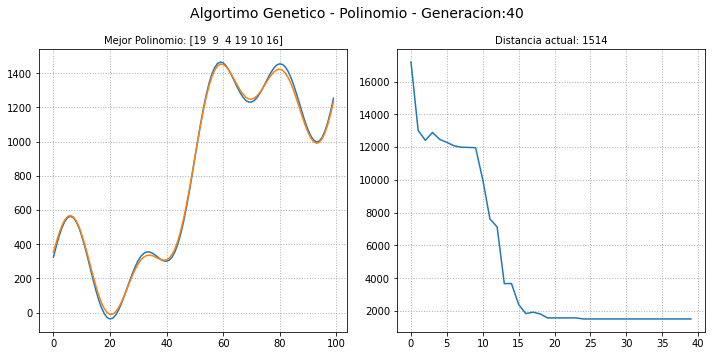

Distancia minima registrada: 15.14
Mejor generacion: 25
Mejor ruta (Generacion - 25): [19  9  4 19 10 16]
Maxima distancia registrada (Generacion - 1): 17188


In [34]:
mod = [8, 25, 4, 45, 10, 17, 35]
renglones = 200
iteraciones = 40
porcentaje_torneo = 3
porcentaje_mutacion = 40
elit = True
plot_dynamic = True

run(iteraciones, renglones, mod, porcentaje_torneo, porcentaje_mutacion, elit, plot_dynamic)
